# Project Python Foundations: FoodHub Data Analysis

<center><img src="https://api.manofmany.com/wp-content/uploads/2021/02/19-Best-Healthy-Restaurants-in-Sydney.jpeg" width="1600" height="600"></center>

<b><h2><center>FoodHub Restaurant Case Study<h2></b>






# **Context**

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

# **Objective**

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

# **Data Description**

The data contains the different data related to a food order. The detailed data dictionary is given below.

## Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final presentation.


### Let us start by importing the required libraries

In [43]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read the data
df  = pd.read_csv('/content/drive/My Drive/Project1 FoodHub/foodhub_order.csv')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


The  dataset has been loaded properly.
- *The DataFrame has 9 columns and  each row corresponds to the order placed by a customer*.
- *Column 'rating' displays the rating given by the customer out of 5 but we can see some costumer has the 'Not given' rating*


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Check the shape of the dataset
df.shape

(1898, 9)

- *There are 1898 rows and 9 columns in the dataset.*


### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


- *We have 9 variables 1 float64, 4 integer and 4 object*
- *We can see from the 'rating' column  that rating is an object but it should be an integer since the rating is   1 to 5*

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [8]:
# Checking for missing values in the data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

- *There are no missing values so no need to do any treatment for missing values*
- *We will keep in mind that we did not have the  reviews for all the orders, and the missing rating  have 'Not given'*


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# chech the statitical summary of the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


**The above table displays the descriptive analysis for Numerical columns**
- *We can  observe that the average cost of orders  is around 16.49, and 50% of oders is 14.14 and below. 75% of orders cost more than $22 and the maximum cost of order is around 35.*
- *Most of orders are place on the weekend*
- *Most costumers did not submit a review,*
- *The average and median food preparation time  are almost the same around 27mn but we have small differance for the median and the average delivery time which are 25mn and 24mn.*


### **Question 5:** How many orders are not rated? [1 mark]

In [6]:
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

- *As we can see 736 of the rating are not giving. And most of given rating are rating 5, 588 are rating 5.*

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [11]:
# check unique order ID
df['order_id'].nunique()

1898

- *We can see that we 1898 differents orders from costemers*

#### Customer ID

In [12]:
# check unique customer ID
df['customer_id'].nunique()

1200

- *We have 1200 differents costumers who ordered that mean some costumers ordered more than 1 time*

#### Restaurant name

In [8]:
# check unique Restaurant Name
df['restaurant_name'].nunique()

178

- *We have 178 restaurants  present in the system*


#### Cuisine type

In [14]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14


- *We have 14 differents type of menu*

<Axes: xlabel='cuisine_type', ylabel='count'>

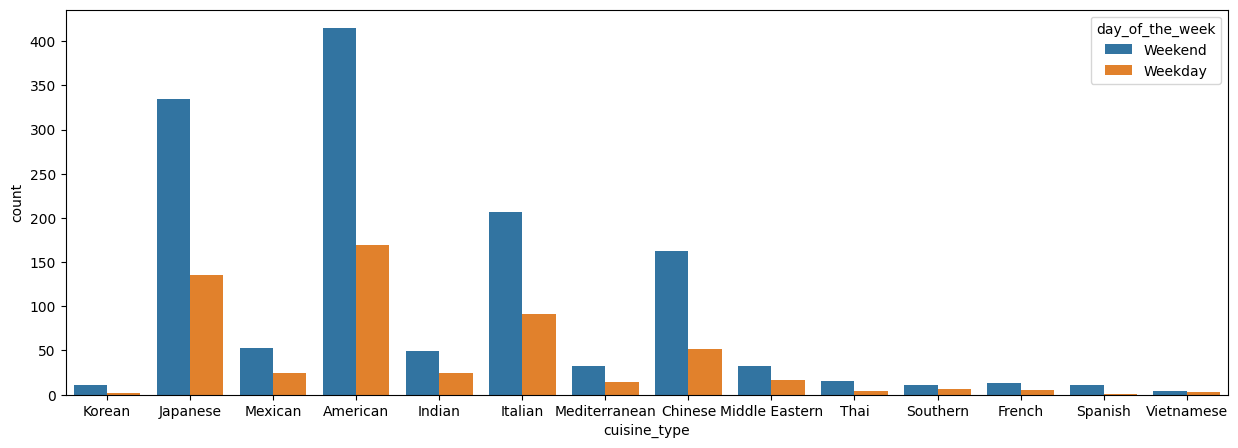

In [15]:
## Create a We have 14 differents type of menu


sns.countplot(data = df, x ='cuisine_type',hue= 'day_of_the_week')

- *Custumers order most  of the time American, Japenese, Italian and Chinese food, and on the weekend.*


#### Cost of the order

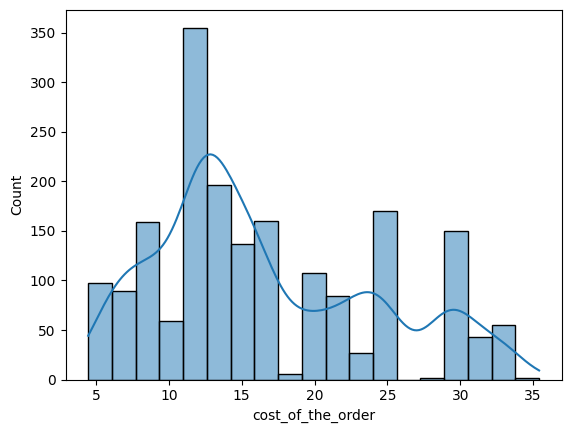

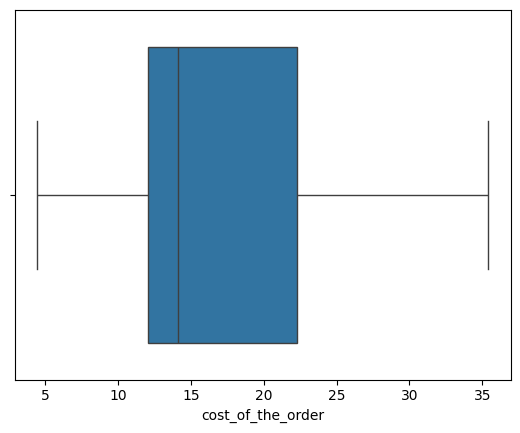

In [7]:
## Histogram for the cost of order
sns.histplot(data=df,x='cost_of_the_order', kde=True)
plt.show()
## Boxplot for the cost of order
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

- *The distribution is left skewed and the average cost is bigger than the median cost.*

#### Day of the week

In [10]:
# # Check the unique values
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

- *We have the order place in weekend and week day in the system.*

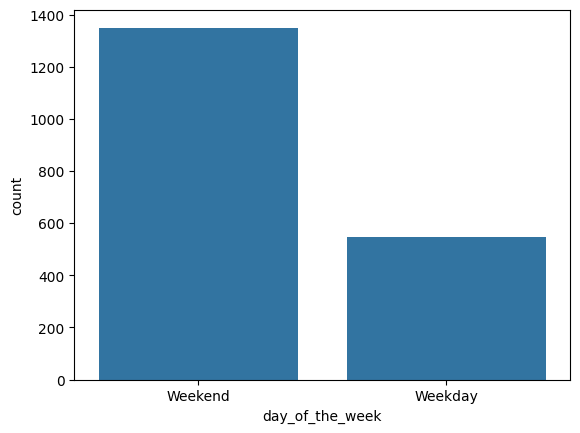

In [9]:
## Complete the code to plot a bar graph for 'day_of_the_week' column
sns.countplot(data = df, x = 'day_of_the_week');


- *There is higher activity over the weekend than during the  weekdays.*

#### Rating

In [19]:
# Check the unique values
## Complete the code to check unique values for the 'rating' column
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

- *We can observe that  costumers give 4 type of rating: 'Not given', '5', '3', '4'.*

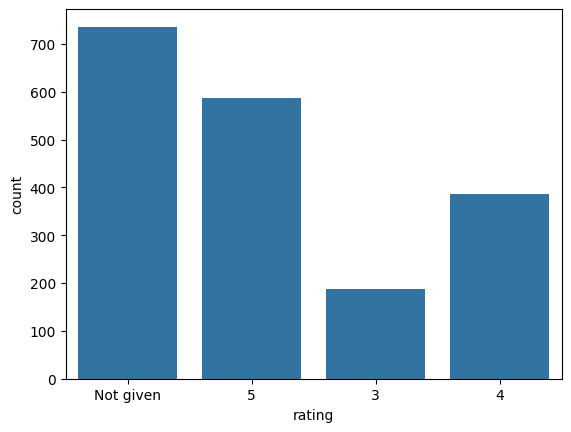

In [20]:
## Complete the code to plot bar graph for 'rating' column
sns.countplot(data = df, x = 'rating');

- *We can observe that more that 700 costumers did not give a review for their order.*
- *Almost 600 costumers  gave a rating  5.*
- *Almost 400 costumers  gave a rating  4.*
- *Least than 200 gave a rating 3.*

#### Food Preparation time

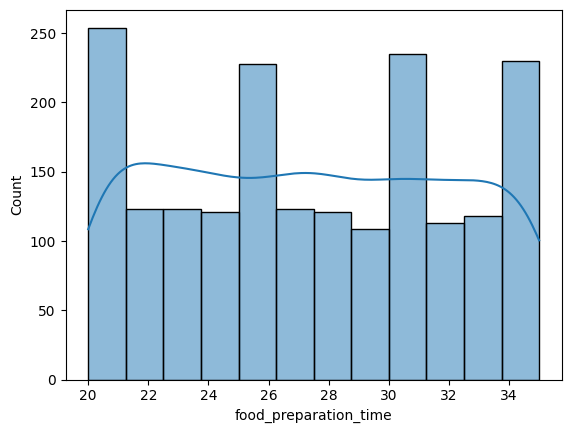

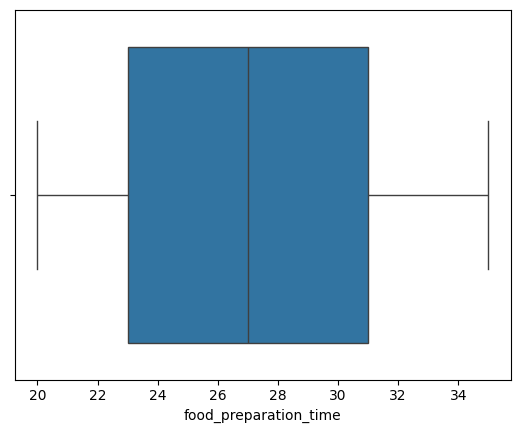

In [21]:
## Complete the code to plot the histogram for the cost of order
sns.histplot(data=df,x='food_preparation_time', kde=True)
plt.show()
## Complete the code to plot the boxplot for the cost of order
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

- *We can observe  a fairly even distribution of the time it takes to prepare the dish between 20 minutes and 36 minutes and  median around 27 minutes.*

#### Delivery time

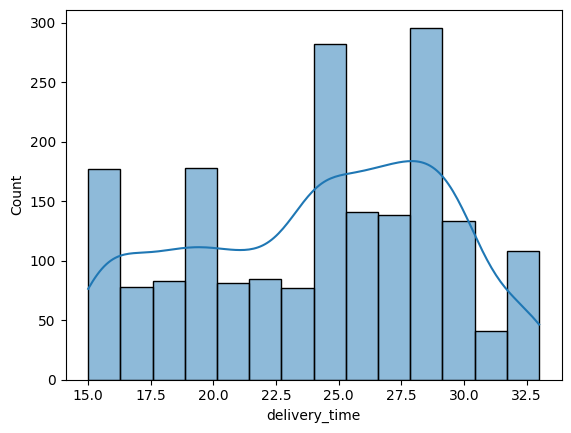

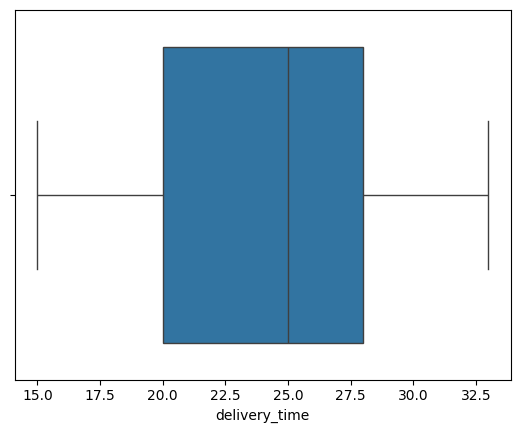

In [22]:
## Complete the code to plot the histogram for the delivery time
sns.histplot(data=df,x='delivery_time', kde=True)
plt.show()
## Complete the code to plot the boxplot for the delivery time
sns.boxplot(data=df,x='delivery_time')
plt.show()

- *We can observee that the distributionis left skewed and the median delivery time is about 25 minutes.*
-  *From the histplot we can determine that most orders take between 25 and 28 minutes to be delivered.*

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [13]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

The top 5 restaurants receiving most order are:
- *Shake Shack  with 219 orders*
- *The Meatball Shop with 132 orders*
- *Blue Ribbon Sushi with 119 orders*
- *Blue Ribbon Fried Chicken with 96 orders*
- *Parm with  68 orders*

### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [12]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

- *American Cuisine Type is the most popular during the weekends with a count of 415 orders.*

### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]


In [25]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20]

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


- *The number of total orders that cost above 20 dollars is: 555.*
- *Percentage of orders above 20 dollars: 29.24 %.*

### **Question 10:** What is the mean order delivery time? [1 mark]

In [26]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


- *The average delivery time for this dataset is 24.16 minutes*

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [27]:
# Get the counts of  each customer_id
# Get the top 5 cmost frequent customers
df['customer_id'].value_counts().head(5)

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
Name: count, dtype: int64

The top 3 most frequent customers are:
- *customer with id number 52832*
- *customer with id number 47440*
- *customer with id number 83287*

### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

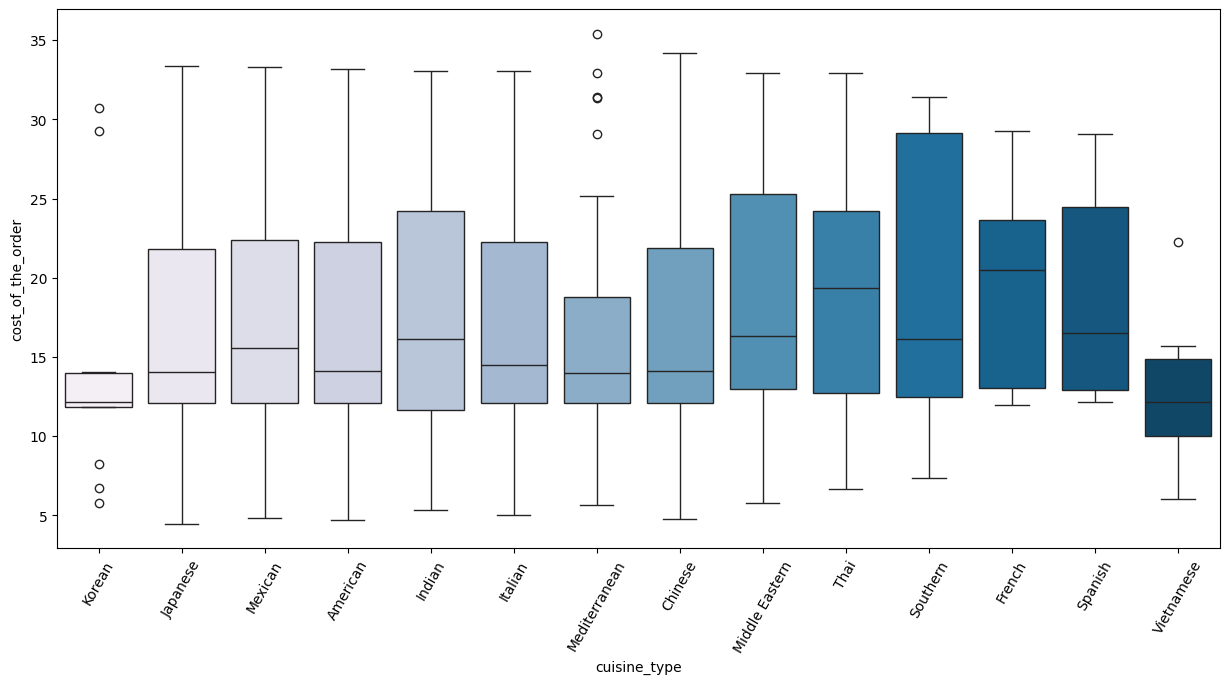

In [28]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df,  palette="PuBu", hue= "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

- *The median cost of order for the differents  cuisines type  varie between 13 to 17 dollard  with a few having outliers such as Korean, Mediterranean and Vietnamese cuisines.*

#### Cuisine vs Food Preparation time

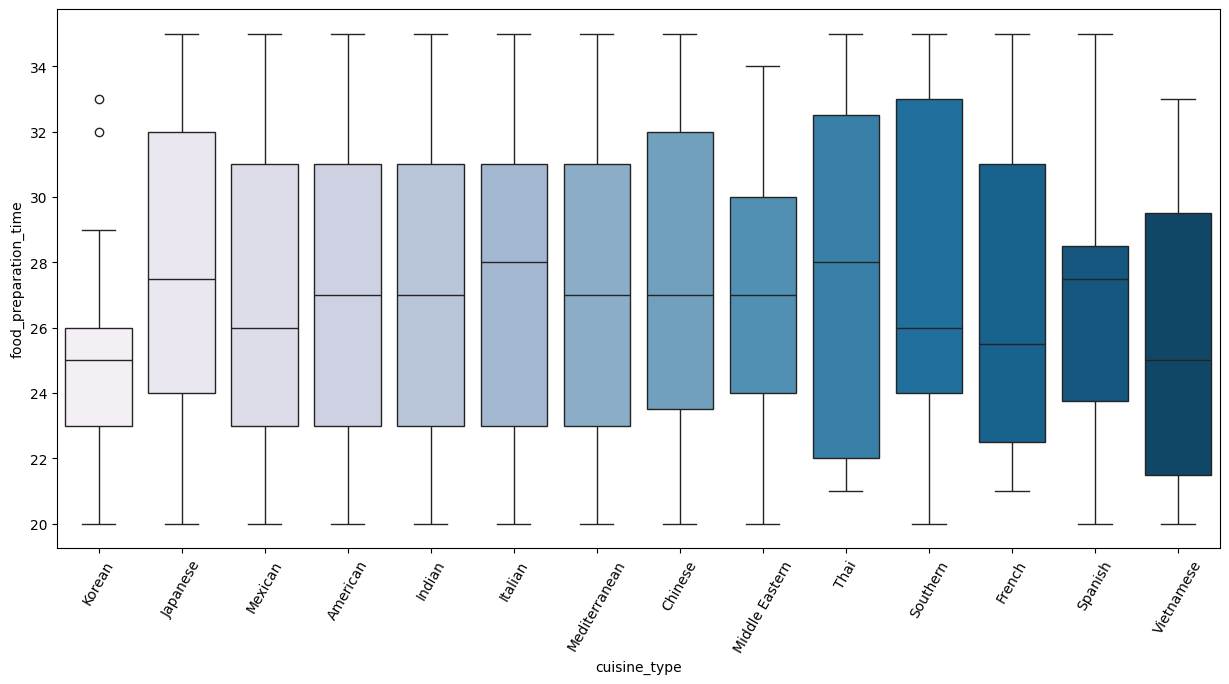

In [29]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data=df,  x='cuisine_type', y='food_preparation_time', palette="PuBu", hue= "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

- *Most cuisine types have more or less the same average preparation time.*

#### Day of the Week vs Delivery time

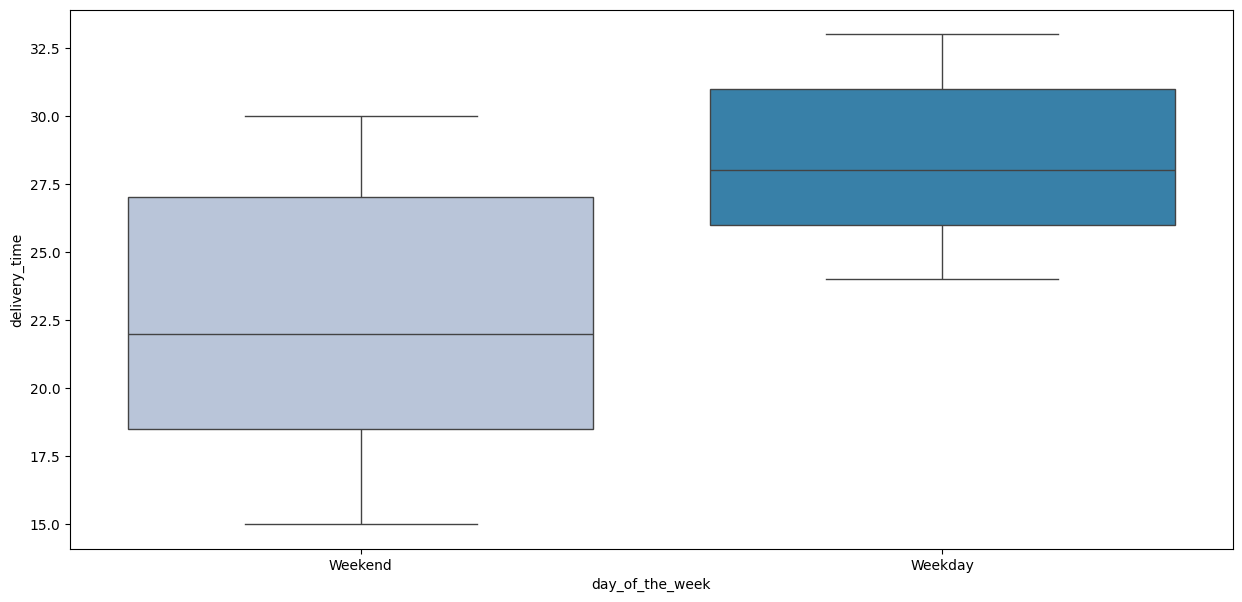

In [30]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(data=df,  x='day_of_the_week', y='delivery_time', palette='PuBu', hue= 'day_of_the_week')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

- *The delivery time on weekend is shorter than the week day with a median of around 22 minutes on weekend and 27 minutes of week day.*

#### Run the below code and write your observations on the revenue generated by the restaurants.

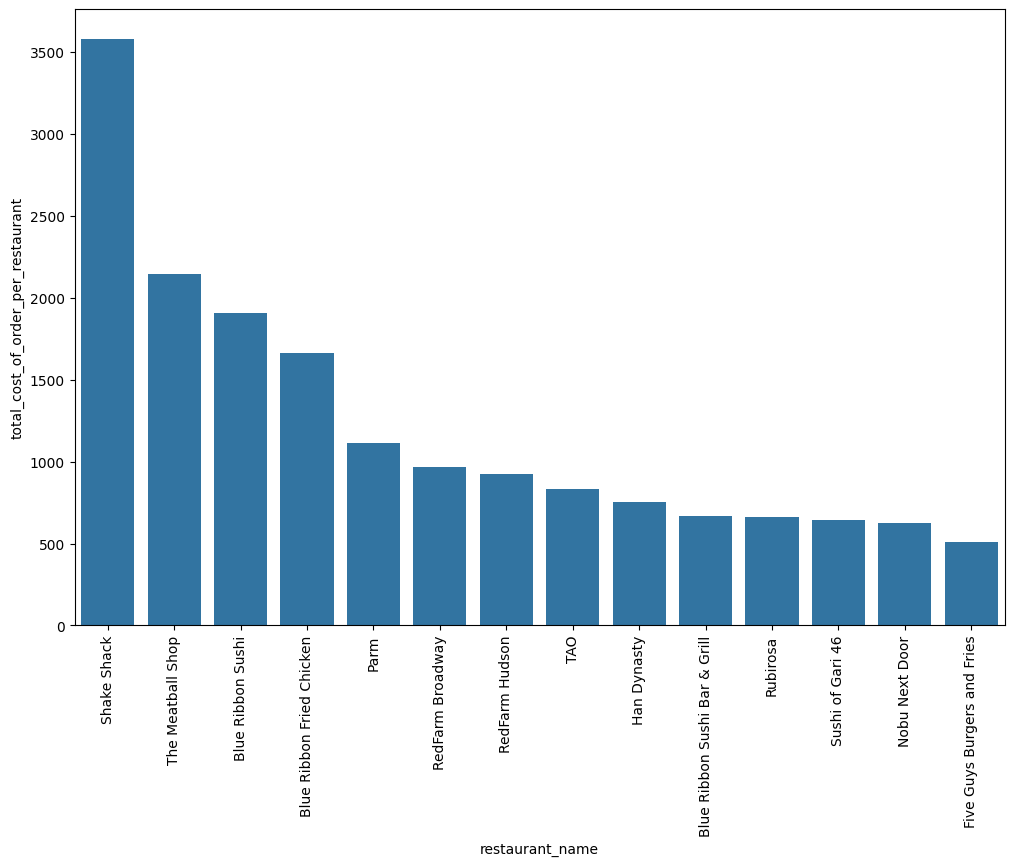

In [31]:
df_revenue_per_restaurant= df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).reset_index().head(14)
#print(type(df_revenue_per_restaurant))
df_revenue_per_restaurant.rename(columns={'cost_of_the_order':'total_cost_of_order_per_restaurant'}, inplace=True)
df_revenue_per_restaurant


plt.figure(figsize=(12,8))
sns.barplot(data = df_revenue_per_restaurant, x='restaurant_name', y='total_cost_of_order_per_restaurant')
plt.xticks(rotation=90);


As we can see 5 restaurants more than $1000 revenu
- *Shake Shack with  more than 3500 dollars*
- *The Meatball Shop with more than 2000 dollars*
- *Blue Ribbon Sushi with around 2000 dollars*
- *Blue RibbonFried Chicken around 1700 dollars*
- *Parm more than 1000 dollars*
- *The rest of the restaurant make less that 1000 Dollards*

#### Rating vs Delivery time

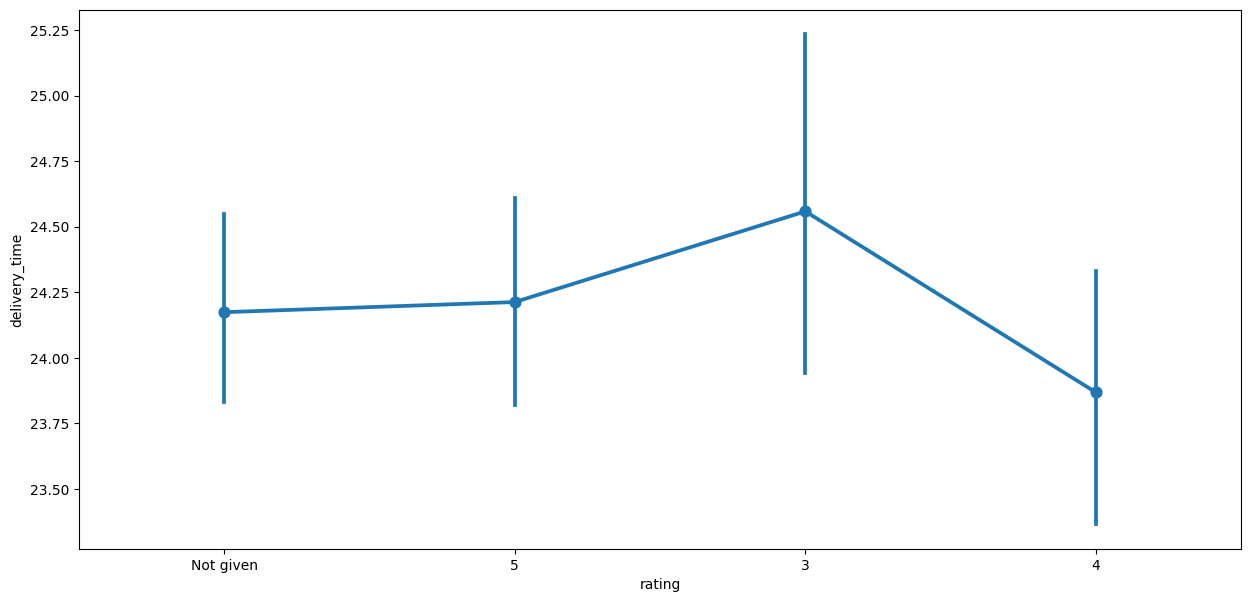

In [32]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y= 'delivery_time', data = df)
plt.show()

We can observe that:
- *the custumers with rating 3 have the hightest delivery time*
- *the custumers with rating 5 or no rating have the same delivery time*
- *the custumers with rating 4 have the lowest delivery time*


#### Rating vs Food preparation time

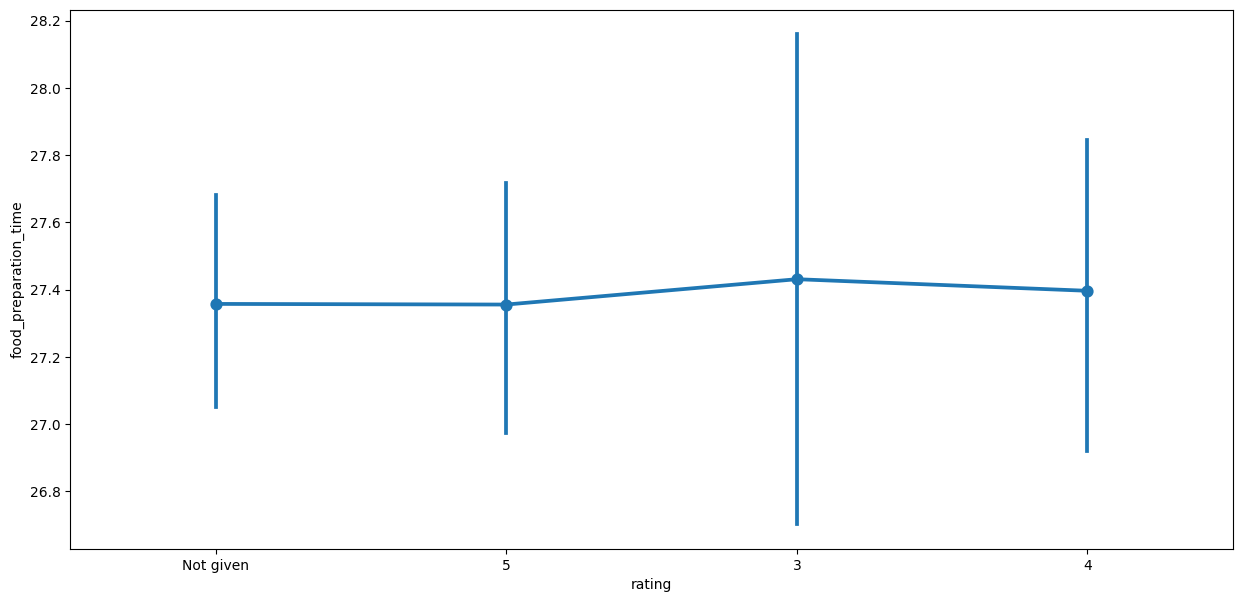

In [33]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y= 'food_preparation_time', data = df )
plt.show()

- *The average food preparation is almost the same*

#### Rating vs Cost of the order

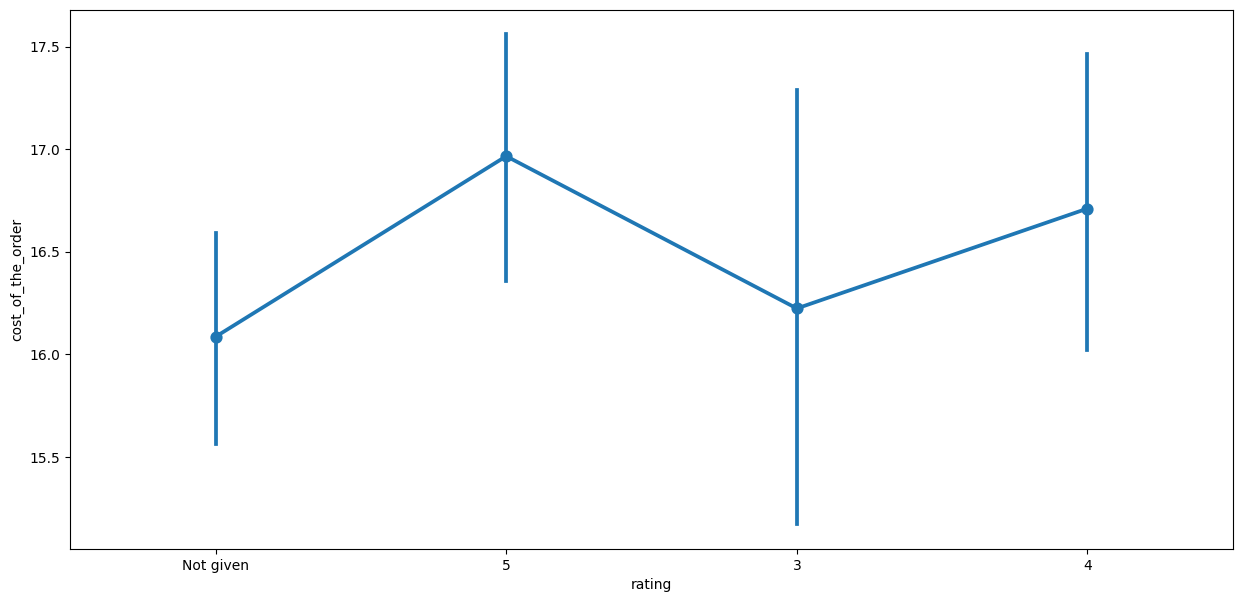

In [34]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y= 'cost_of_the_order', data = df)
plt.show()

- *The cost of orders is higher with  the customers rating 5 and 4*

#### Correlation among variables

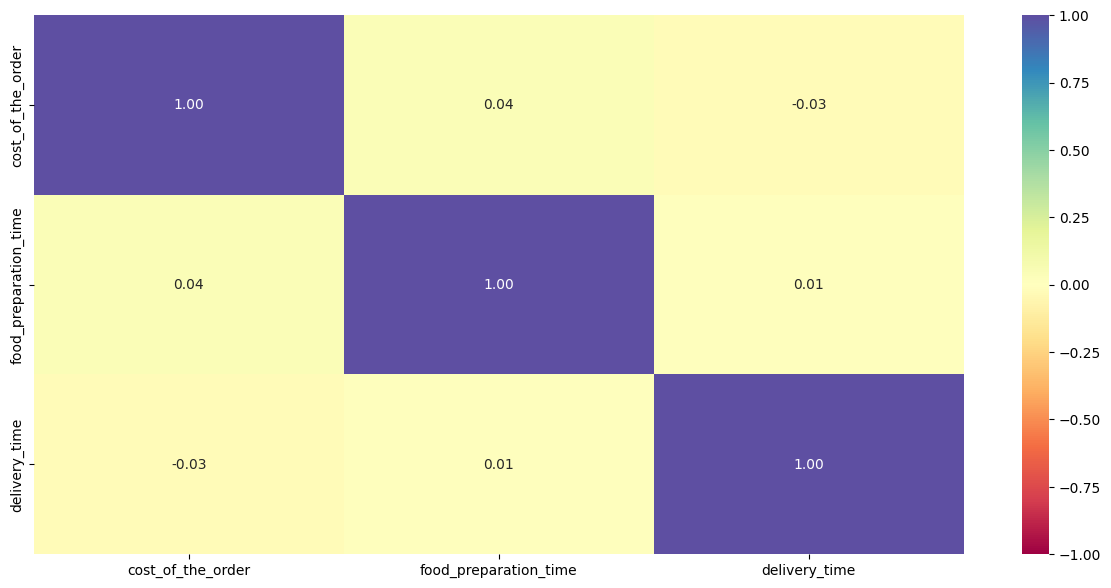

In [35]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- *The heatmap shows very weak correlation between the cost of order, the delivery time and the preparation time.*

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [13]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head(14)

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
5,Parm,39
6,RedFarm Hudson,34
7,TAO,28
8,Rubirosa,24
9,Nobu Next Door,23


- *The result above give us the most rating restaurants.*

In [12]:
# Get the restaurant names that have rating count more than 50
#print(df_rating_count)
rest_names = df_rating_count[df_rating_count['rating'] >50] ['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().round(2).sort_values(ascending = False).reset_index().dropna()


,restaurant_name,rating
0,The Meatball Shop,4.51
1,Blue Ribbon Fried Chicken,4.33
2,Shake Shack,4.28
3,Blue Ribbon Sushi,4.22


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [39]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0
# adding a column 'Revenue' to the dataset to calculate the revenue the company genetated after each order
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [40]:
# get the total revenue and print it
total_rev = df['Revenue'].sum()
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


- *The total revenue of the company is $6166.3.*

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]


In [41]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)
print ('The percentage of orders that have more than 60 minutes of total delivery time is',
       round(df[df['total_time'] > 60].shape[0] / df.shape[0] * 100, 2),'%')




The percentage of orders that have more than 60 minutes of total delivery time is 10.54 %


- *The percentage of orders that have more than 60 minutes of total delivery time is 10.54 %.*

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [42]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it

print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:


1.   More  than  700 costumers did not give a review for their order and most the costumers who gave a review gave a 5 or 4 rating.

2.   The restaurant with an average higter review have more orders like Shake Shack, The Meatball Shop, Blue Ribbon Sushi and Blue RibbonFried Chicken.
Also, the costumers with  the rating is 5 or 4 are the one who put mostly a rating. So it is  possible that mostly the very satisfied customers are the one rating the service.
May be we should dig on the 'no rating costumers' to see why  they are not puting a rating.  Is that they are unsatisfied or not.

3.  The  preparation time is relatively consistent compared to the delivery time, meaning  that the delivery time is the significant variable in total preparation time (total time between order and delivery to customer).

4.   The average cost of orders is higher with the customers rating 5 and 4 whereas the delivery time of costumer rating 3 is  hight compare the others.








### Recommendations:

1.   The company should focus on costumer satisfaction  because more than 700 costumers  did not give a rating and if we have  more rating that may change the  distribution we have and help also improve some aspect of the service. So can come up with something to push costumers to  give a rating, for example a promotional offers or discount.

2.  The company should try to  improve on total order time by improving the delivery time. Also a hight delevery time may be reason on certain review and the low orders during week days, We know week days we have traffic, so further analysis a neccessary to see how can we do to improve the delivery.

3.   To increase the Revenue, we should drawn a target segment market and differenciate the area where we have a higher concentration of students and a  higher concentration of professionals. And depend of the demographic area we can launch specifiic marketing proram. Further analysis of the customers demographics is needed for that,

4.    A better marketing can be created to boost the orders for example a reward program. Also a discount program for leaast popular cuisines,.




---